<a href="https://colab.research.google.com/github/Mingnarto/TensorFlow/blob/main/Computer_Vision_With_TensorFlow_Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-06-28 07:07:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   214MB/s    in 0.5s    

2021-06-28 07:07:02 (214 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# The extra file in our pizza_steak directory is '.DS_Store'
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 24 07:57 .
drwxr-xr-x 1 root root 4096 Jun 24 07:59 ..
-rw-r--r-- 1 root root 6148 Jun 24 07:59 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 24 07:57 test
drwxr-xr-x 4 root root 4096 Jun 24 07:57 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # Created a list of class_names from the subdirectories
class_names = class_names[1:]  # remove .DS_Store
print(class_names)

[]


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')  # show the shape of the image

  return img

['3546278.jpg']
Image shape: (512, 289, 3)


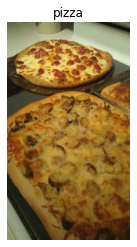

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 33,  18,  13],
        [ 36,  21,  16],
        [ 38,  23,  18],
        ...,
        [105,  63,  49],
        [ 95,  57,  44],
        [ 99,  63,  51]],

       [[ 37,  19,  15],
        [ 38,  20,  16],
        [ 40,  23,  16],
        ...,
        [104,  62,  48],
        [ 96,  58,  45],
        [ 99,  63,  51]],

       [[ 38,  21,  14],
        [ 38,  21,  14],
        [ 39,  22,  14],
        ...,
        [104,  62,  48],
        [ 99,  61,  48],
        [ 98,  62,  50]],

       ...,

       [[140,  54,   3],
        [186, 100,  43],
        [240, 153,  86],
        ...,
        [ 81,  34,  18],
        [ 80,  33,  17],
        [ 80,  33,  17]],

       [[215, 120,  36],
        [255, 170,  86],
        [248, 152,  66],
        ...,
        [ 81,  34,  18],
        [ 79,  32,  16],
        [ 78,  31,  15]],

       [[255, 158,  54],
        [246, 147,  45],
        [246, 146,  50],
        ...,
        [ 83,  36,  2

In [ ]:
# View the image shape
img.shape  # return (width, height, 3 different color channels for RGB)

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.12941176, 0.07058824, 0.05098039],
        [0.14117647, 0.08235294, 0.0627451 ],
        [0.14901961, 0.09019608, 0.07058824],
        ...,
        [0.41176471, 0.24705882, 0.19215686],
        [0.37254902, 0.22352941, 0.17254902],
        [0.38823529, 0.24705882, 0.2       ]],

       [[0.14509804, 0.0745098 , 0.05882353],
        [0.14901961, 0.07843137, 0.0627451 ],
        [0.15686275, 0.09019608, 0.0627451 ],
        ...,
        [0.40784314, 0.24313725, 0.18823529],
        [0.37647059, 0.22745098, 0.17647059],
        [0.38823529, 0.24705882, 0.2       ]],

       [[0.14901961, 0.08235294, 0.05490196],
        [0.14901961, 0.08235294, 0.05490196],
        [0.15294118, 0.08627451, 0.05490196],
        ...,
        [0.40784314, 0.24313725, 0.18823529],
        [0.38823529, 0.23921569, 0.18823529],
        [0.38431373, 0.24313725, 0.19607843]],

       ...,

       [[0.54901961, 0.21176471, 0.01176471],
        [0.72941176, 0.39215686, 0.16862745],
        [0.94117647, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling / normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding='valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 0.5287 - accuracy: 0.7380 - val_loss: 0.4111 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4103 - accuracy: 0.8187 - val_loss: 0.3213 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4142 - accuracy: 0.8167 - val_loss: 0.4040 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3789 - accuracy: 0.8327 - val_loss: 0.3319 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3395 - accuracy: 0.8513 - val_loss: 0.3106 - val_accuracy: 0.8660


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before
Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.00667&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
# Use the random seed
tf.random.set_seed(42)

# Create the model to recreate the tensorFlow Playground model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 1.5997 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Summary of model_2
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set random set seed
tf.random.set_seed(42)

# Create the model (same as aove but let's step on it)
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 4.2118 - accuracy: 0.6240 - val_loss: 1.2673 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 1.3304 - accuracy: 0.6853 - val_loss: 0.8350 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6216 - accuracy: 0.7267 - val_loss: 0.9676 - val_accuracy: 0.5420
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.5180 - accuracy: 0.7600 - val_loss: 0.5149 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5394 - accuracy: 0.7487 - val_loss: 0.4352 - val_accuracy: 0.7900


In [ ]:
# Get a summary of model_4
model_4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_58 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_59 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_60 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**NOTE:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with tha data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

## 1. Become one with the data

['1213988.jpg']
Image shape: (512, 383, 3)
['38349.jpg']
Image shape: (384, 512, 3)


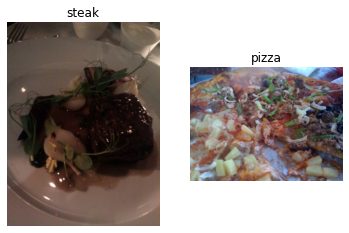

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train/', 'pizza')

## 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896

In [ ]:
# Check what kind of GPU you are using
# !nvidia-smi

Fri Jun 25 04:44:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |   2282MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of images
                                               target_size=(224,224),  # Target size of images (height, width)
                                               class_mode='binary',  # type of data you're working with
                                               batch_size=32)  # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next()  # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.7725491 , 0.6784314 , 0.58431375],
          [0.79215693, 0.6901961 , 0.6       ],
          [0.7843138 , 0.68235296, 0.5921569 ],
          ...,
          [0.454902  , 0.28627452, 0.22352943],
          [0.46274513, 0.29411766, 0.23137257],
          [0.45098042, 0.28235295, 0.21960786]],
 
         [[0.7725491 , 0.6784314 , 0.58431375],
          [0.78823537, 0.6862745 , 0.59607846],
          [0.8117648 , 0.7058824 , 0.62352943],
          ...,
          [0.47450984, 0.30588236, 0.2392157 ],
          [0.44705886, 0.2784314 , 0.21176472],
          [0.48627454, 0.31764707, 0.25490198]],
 
         [[0.78823537, 0.68235296, 0.6       ],
          [0.8117648 , 0.7058824 , 0.62352943],
          [0.8117648 , 0.7058824 , 0.6313726 ],
          ...,
          [0.41176474, 0.2509804 , 0.17254902],
          [0.46274513, 0.3019608 , 0.22352943],
          [0.48235297, 0.32156864, 0.2509804 ]],
 
         ...,
 
         [[0.69411767, 0.6       , 0.4901961 ],
          [0.71764

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

### Breakdown of Conv2D layer

1. **Hyperparameter name**: Filters
  - **What does it do?** Decides how many filters should pass over an input tensor (e.g. sliding windows over an image).
  - **Typical values:** *10, 32, 64, 128 (higher values lead to more complex models)*
2. **Hyperparameter name:** Kernel size (also called filter size)
  - **What does it do?** Determines the shape of the filters (sliding windows) over the output.
  - **Typical values:** *3, 5, 7 (lowers values learn finer features, higher values learn larger features)*
3. **Hyperparameter name:** Padding
  - **What does it do?** Pads the target tensor with zeroes(if *'same'*) to preserve input shape. Or leaves in the target tensor as is (if *'valid'*), lowering output shape.
  - **Typical values:** *'same' or 'valid'*
4. **Hyperparameter name:** Strides
  - **What does it do?** The number of steps a filter takes across an image at a time (e.g. if *strides=1*, a filter moves across an image 1 pixel at a time).
  - **Typical values:** *1 (default), 2*


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_5 = Sequential([
                      Conv2D(filters=10,  # filter is the number of sliding windows going across an input (higher = more complex model)
                             kernel_size=3,  # the size of the sliding windows going across an input
                             strides=1,  # the size of the step sliding window takes across an input
                             padding='valid',  # if 'same', output shape is same as input shape & if 'valid', output shape gets compressed
                             activation='relu',
                             input_shape=(224,224,3)),  # input layer (specify input shape)
                      Conv2D(10, 3, activation='relu'),  # Conv2D(filters, kernel_size, activation)
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')  # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
# Get a summary of our model
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_5 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.7321 - accuracy: 0.6173 - val_loss: 0.5247 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4745 - accuracy: 0.7793 - val_loss: 0.4282 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3814 - accuracy: 0.8300 - val_loss: 0.5509 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.2725 - accuracy: 0.9047 - val_loss: 0.4128 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.1217 - accuracy: 0.9607 - val_loss: 0.4065 - val_accuracy: 0.8120


## 5. Evaluating our model
It looks like our model is learning something, let's evaluate it.

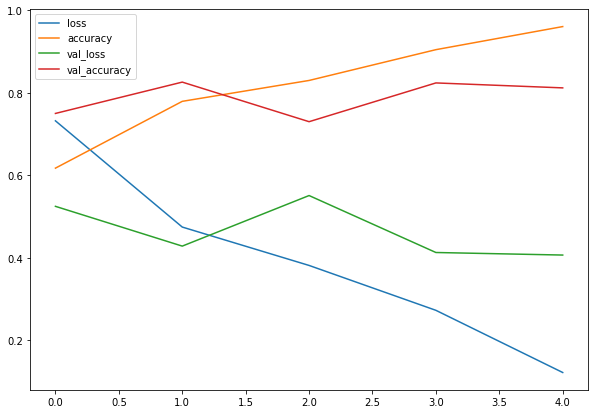

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  '''
  Returns separate loss curves for training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))  # how many epochs did we run for?

  # Plot_loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

> **NOTE:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

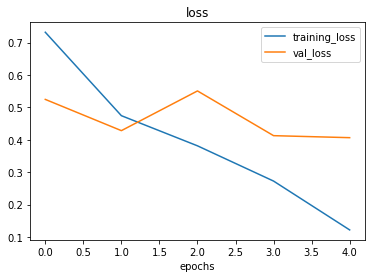

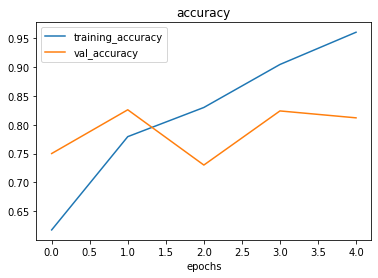

In [ ]:
# Check out the loss and accuracy of model_5
plot_loss_curves(history_5)

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **NOTE:** **Reducing overfitting** is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)

model_6 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6042 - accuracy: 0.6860 - val_loss: 0.4243 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4422 - accuracy: 0.8000 - val_loss: 0.5214 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4379 - accuracy: 0.8040 - val_loss: 0.3475 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3876 - accuracy: 0.8327 - val_loss: 0.3505 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3563 - accuracy: 0.8513 - val_loss: 0.3192 - val_accuracy: 0.8680


In [ ]:
# Get a summary of our model with max pooling
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6760)             

In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_5 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


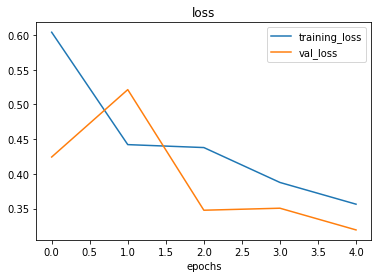

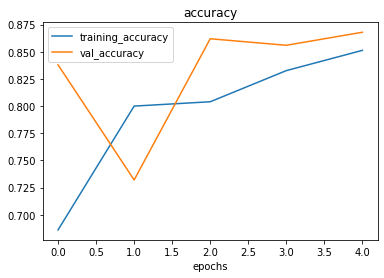

In [ ]:
# Plot loss curves
plot_loss_curves(history_6)

## Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,  # how much do you want to rotate an image?
                                             shear_range=0.2,  # how much do you want to shear an image?
                                             zoom_range=0.2,  # zoom in randomly on an image
                                             width_shift_range=0.2,  # move your image around on the x-axis
                                             height_shift_range=0.2,  # move your image around on the y-axis
                                             horizontal_flip=True)  # do you want to flip an image?
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)  # for demonstration purposes only
# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
# Create non-augmented test data batches
print('non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  # note: labels aren't augmented, only data (images)

showing image number: 21


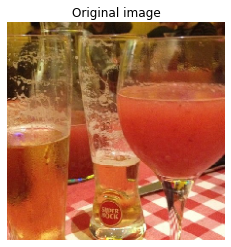

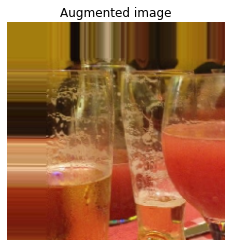

In [ ]:
# Show original image and augmeneted image
import random
random_number = random.randint(0, 32)  # our batches sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

Now we've seen what augmeneted training data looks like, let's buid a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model 6)
model_7 = Sequential([
                      tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
                      tf.keras.layers.MaxPool2D(pool_size=2),
                      tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
                      tf.keras.layers.MaxPool2D(),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented,  # fitting model_7 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 423ms/step - loss: 0.7021 - accuracy: 0.4833 - val_loss: 0.6845 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6920 - accuracy: 0.5347 - val_loss: 0.6784 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 20s 417ms/step - loss: 0.6772 - accuracy: 0.5820 - val_loss: 0.6063 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6551 - accuracy: 0.6080 - val_loss: 0.5600 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6181 - accuracy: 0.6940 - val_loss: 0.6099 - val_accuracy: 0.6120


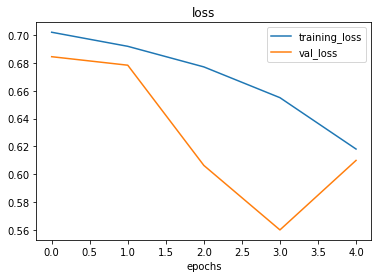

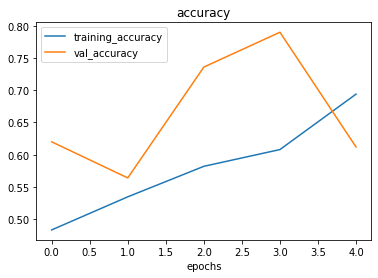

In [ ]:
# Check our models training curves
plot_loss_curves(history_7)

Let's shuffle our training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmeneted_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size=(224,224),
                                                                             class_mode='binary',
                                                                             batch_size=32,
                                                                             shuffle=True)  # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_6 and model_7)
model_9 = Sequential([
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data_augmeneted_shuffled,  # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmeneted_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 421ms/step - loss: 0.6270 - accuracy: 0.6520 - val_loss: 0.4796 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 20s 417ms/step - loss: 0.5124 - accuracy: 0.7480 - val_loss: 0.3892 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 20s 420ms/step - loss: 0.5099 - accuracy: 0.7660 - val_loss: 0.4222 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 20s 417ms/step - loss: 0.4859 - accuracy: 0.7573 - val_loss: 0.3857 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 20s 417ms/step - loss: 0.4716 - accuracy: 0.7787 - val_loss: 0.3424 - val_accuracy: 0.8480


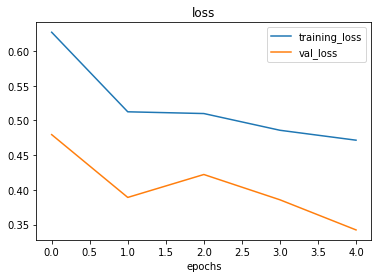

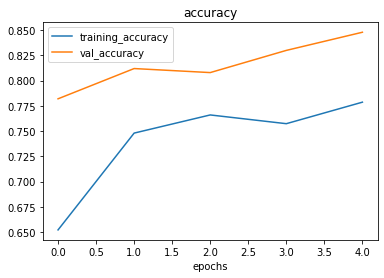

In [ ]:
# Plot loss curves
plot_loss_curves(history_9)

> **NOTE:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak).

## 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 24s 468ms/step - loss: 0.6434 - accuracy: 0.6373 - val_loss: 0.4393 - val_accuracy: 0.8020
Epoch 2/10
47/47 [==============================] - 21s 439ms/step - loss: 0.5225 - accuracy: 0.7327 - val_loss: 0.3611 - val_accuracy: 0.8400
Epoch 3/10
47/47 [==============================] - 21s 439ms/step - loss: 0.4889 - accuracy: 0.7727 - val_loss: 0.3674 - val_accuracy: 0.8580
Epoch 4/10
47/47 [==============================] - 21s 440ms/step - loss: 0.4600 - accuracy: 0.8013 - val_loss: 0.3274 - val_accuracy: 0.8700
Epoch 5/10
47/47 [==============================] - 21s 440ms/step - loss: 0.4594 - accuracy: 0.8013 - val_loss: 0.3263 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 21s 440ms/step - loss: 0.4618 - accuracy: 0.7940 - val_loss: 0.2985 - val_accuracy: 0.8680
Epoch 7/10

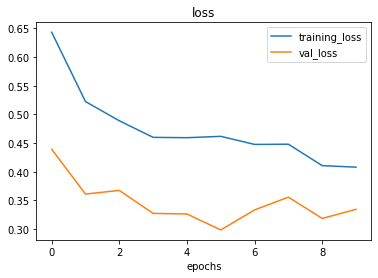

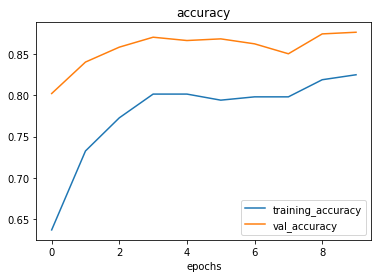

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling / normalization) with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1./255)

# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

# Create non-augmented test data batches
print('non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

# Set the seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Conv2D(filters=32,
                                                       kernel_size=3,
                                                       activation='relu'),
                                Conv2D(32,3,activation='relu'),
                                tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                Conv2D(32,3,activation='relu'),
                                Conv2D(32,3,activation='relu'),
                                MaxPool2D(),
                                Flatten(),
                                Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(train_data_augmented_shuffled,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented_shuffled),
                          validation_data=test_data,
                          validation_steps=len(test_data))

# Plot loss curves
plot_loss_curves(history_10)

## Making a prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2021-06-28 08:32:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2021-06-28 08:32:14 (39.0 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



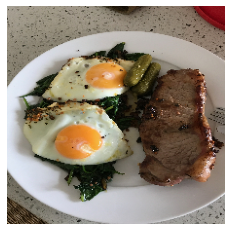

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> **NOTE:** When you train a neural network and you want to make prediction with it on your own custom data, it's important for your custom data (or new data) to be preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  '''
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_9.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.86440533]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi_class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
                           
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

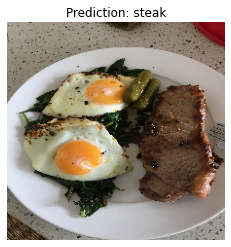

In [ ]:
# Test our model on a custom image
pred_and_plot(model_9, '03-steak.jpeg')

Our model works! Let's try it on anothe rimage... this time pizza

--2021-06-28 09:04:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2021-06-28 09:04:24 (60.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



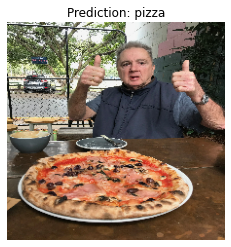

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_9, '03-pizza-dad.jpeg')

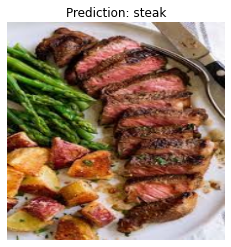

In [ ]:
pred_and_plot(model_9, 'download.jpg')

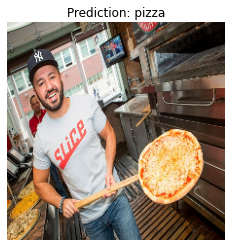

In [ ]:
pred_and_plot(model_9, 'test.jpeg')

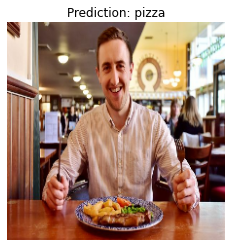

In [ ]:
pred_and_plot(model_9, 'test2.jpg')

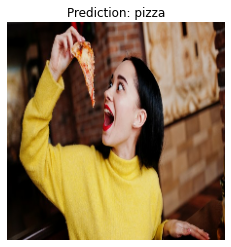

In [ ]:
pred_and_plot(model_9, 'test3.jpg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-06-29 06:38:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.13.240, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   233MB/s    in 2.1s    

2021-06-29 06:38:24 (233 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun 29 02:40 .
drwxr-xr-x  1 root root 4096 Jun 29 02:40 ..
drwxr-xr-x 12 root root 4096 Jun 29 02:40 test
drwxr-xr-x 12 root root 4096 Jun 29 02:40 train


In [ ]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2836330.jpg']
Image shape: (512, 512, 3)


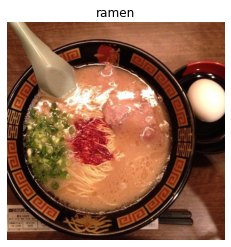

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_11 = Sequential([
                       tf.keras.layers.Conv2D(filters=10,
                                              kernel_size=3,
                                              input_shape=(224,224,3)),
                       Activation(activation='relu'),  # in case you want to separate the activation
                       Conv2D(10, 3, activation='relu'),
                       tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                       Conv2D(10,3,activation='relu'),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')  # change to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [ ]:
## 4. Fit a model
history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 74s 182ms/step - loss: 2.1381 - accuracy: 0.2219 - val_loss: 2.0114 - val_accuracy: 0.2824
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.9047 - accuracy: 0.3364 - val_loss: 1.9431 - val_accuracy: 0.3140
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.6439 - accuracy: 0.4339 - val_loss: 1.8634 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 1.1316 - accuracy: 0.6259 - val_loss: 2.1892 - val_accuracy: 0.3148
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 0.5292 - accuracy: 0.8316 - val_loss: 2.9641 - val_accuracy: 0.2820


## 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_11.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 3.9991 - accuracy: 0.2684


[3.9990742206573486, 0.26840001344680786]

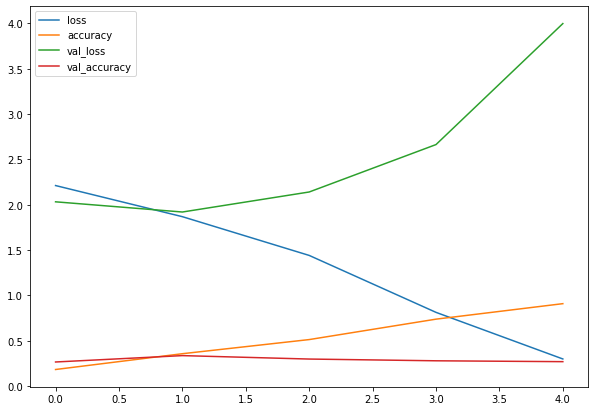

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_11.history).plot(figsize=(10,7));

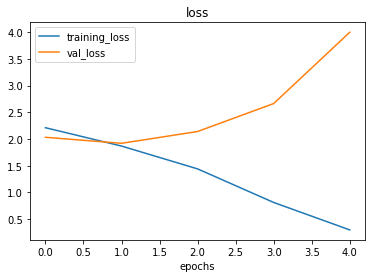

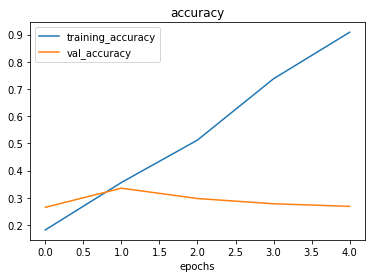

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_11)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data.

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the dat, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
- **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first
# Let's try to remove 2 convolutional layers...
model_12 = Sequential([
                       Conv2D(filters=10,
                              kernel_size=3,
                              activation='relu'),
                       MaxPool2D(pool_size=(2,2)),
                       Conv2D(10,3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])

model_12.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [ ]:
# Fit the model with 2x conv layers removed
history_12 = model_12.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 173ms/step - loss: 2.1380 - accuracy: 0.2491 - val_loss: 1.9920 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 40s 172ms/step - loss: 1.8516 - accuracy: 0.3705 - val_loss: 1.9087 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 41s 174ms/step - loss: 1.5174 - accuracy: 0.4876 - val_loss: 2.0035 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 40s 172ms/step - loss: 1.0322 - accuracy: 0.6713 - val_loss: 2.2779 - val_accuracy: 0.2964
Epoch 5/5
235/235 [==============================] - 40s 172ms/step - loss: 0.5932 - accuracy: 0.8221 - val_loss: 2.7373 - val_accuracy: 0.2876


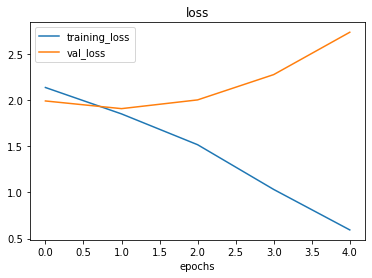

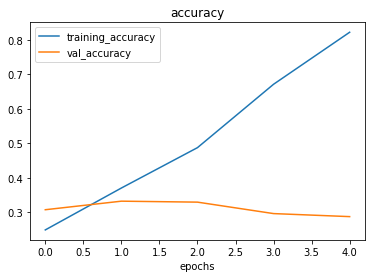

In [ ]:
# Check out the loss curves of model_12
plot_loss_curves(history_12)

Looks like our 'simplifying the model' experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

## Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
- Reduce overfitting (get the train and validation loss curves closer)
- Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
 # Let's create another model but this time we'll fit it on the augmented training data of 10 classes
 model_14=tf.keras.models.clone_model(model_11)

 # Compile the clone model (using the same setup as previous models)
 model_14.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

In [ ]:
model_14.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
# Fit the model
history_14=model_14.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 100s 423ms/step - loss: 2.2250 - accuracy: 0.1721 - val_loss: 2.1116 - val_accuracy: 0.2340
Epoch 2/5
235/235 [==============================] - 99s 422ms/step - loss: 2.1176 - accuracy: 0.2356 - val_loss: 2.0012 - val_accuracy: 0.2836
Epoch 3/5
235/235 [==============================] - 100s 425ms/step - loss: 2.0578 - accuracy: 0.2643 - val_loss: 1.9428 - val_accuracy: 0.3084
Epoch 4/5
235/235 [==============================] - 100s 424ms/step - loss: 2.0145 - accuracy: 0.2869 - val_loss: 1.9214 - val_accuracy: 0.3248
Epoch 5/5
235/235 [==============================] - 99s 421ms/step - loss: 1.9937 - accuracy: 0.2971 - val_loss: 1.8861 - val_accuracy: 0.3376


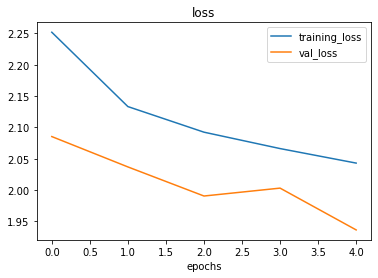

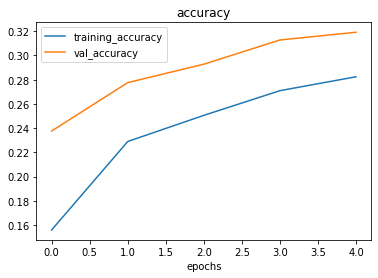

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_14)

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 2.9641 - accuracy: 0.2820


[2.964118242263794, 0.28200000524520874]

In [ ]:
model_14.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 1.9365 - accuracy: 0.3192


[1.9364806413650513, 0.3192000091075897]

Woah! That's looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements

## 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

## Making a prediction with our model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-06-29 07:20:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-06-29 07:20:57 (62.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2021-06-29 07:20:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi_class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
                           
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

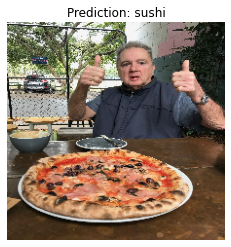

In [ ]:
# Make a prediction using model_14
pred_and_plot(model=model_14,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

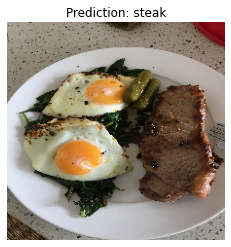

In [ ]:
pred_and_plot(model=model_14,
              filename='03-steak.jpeg',
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [ ]:
# Save a model
# model_14.save('saved_trained_model_14')

INFO:tensorflow:Assets written to: saved_trained_model_14/assets


In [ ]:
# Load in a trained model and evaluate it
# loaded_model_14 = tf.keras.models.load_model('saved_trained_model_14')
# loaded_model_14.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.9365 - accuracy: 0.3192


[1.9364815950393677, 0.3192000091075897]

In [ ]:
# Compare our loaded model to our existing model
# model_14.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.9365 - accuracy: 0.3192


[1.936481237411499, 0.3192000091075897]